# Bridge and Air Pollution in Mekong Delta
## Background
#### Mekong Delta in Vietnam is shaped around the Mekong River, splitting into 7 major branches. Previously, transportation between different sides of the rivers rely on ferry systems. However, due to increased in demands for more efficient transportation infastructure, major bridges were built to replace the existing ferry system. To analyze improvement in transportation efficiency, air pollutions before and after bridges are analyzed.  
| Bridge | Year |
| --- | --- |
| My Thuan | 2000|
| Rach Mieu | 2009 |
| Ham Luong | 2010 |
| Can Tho | 2010 |
| My Loi | 2015|
| Co Chien | 2015 |
| Cao Lanh | 2018 |
| Vam Cong | 2019 |

## Data Source and Cleaning
#### Air Pollution from transportation includes CO, NOx, and PM. Due to a lack of air quality sensor in Vietnam, I used remote sensing data of air pollution column density. I need dataset that spans at least 2009 - 2019 with the highest possible resolution and coverage. I have done preliminary analysis on NO2 and Aerosol data. I uploaded these dataset to google earth engine and calculate monthly mean for each dataset from 2007 to 2019.

### NO2
#### I used QA4ECV Project data, which uses combination of OMI, GOME, and SCIAMACHY datasets. The dataset spans from 2004 to now, with a spatial resolution 0.125 arc degrees (22 km) and a near daily temporal resolution. For low resolution NO2 dataset, I only need to extract the pixel value the bridge is in. For additional control, before and after bridge, I include neighboring pixels of the birdge pixel. 

### Aerosol
#### I used Modis terra and aqua dataset, which spans from 2000 to now, with a spatial resolution of 1km and a . Because of the high resolution, the bridge crosses through multiple pixels. Thus, I extract mean value over the bridge region. A concern I have is because of low temporal resolution and high cloud coverage in the summer months, there are many missing datas, thus the sample size to calculate monthly means differs my month. Additionally filtering of the data needs to explored


## Regression and Results
### Regression on NO2
$$
NO2 = \beta_0 + \beta_1 Bridge + \beta_2 Year + Month + Location (1)
$$

$$
NO2 = \beta_0 + \beta_1 Bridge Width + \beta_2 Year + Month + Location (2)
$$

$$
NO2 = \beta_0 + \beta_1 Bridge Area + \beta_2 Year + Month + Location (3)
$$

$$
NO2 = \beta_0 + \beta_1 Bridge + \beta_2 Year + \beta_3 Powerplants \beta_4 El Nino + \beta_5 Precipitation + \beta_6 Temperature + Month + Location (4)
$$

$$
NO2 = \beta_0 + \beta_1 Bridge Width + \beta_2 Year + \beta_3 Powerplants \beta_4 El Nino + \beta_5 Precipitation + \beta_6 Temperature + Month + Location (5)
$$

$$
NO2 = \beta_0 + \beta_1 Bridge Area + \beta_2 Year + \beta_3 Powerplants \beta_4 El Nino + \beta_5 Precipitation + \beta_6 Temperature + Month + Location (6)
$$
#### Bridge is a dummy variable that is 1 when the bridge is in operation, and 0 otherwise. Model has full month and location of the bridge fixed effects, or just month fixed effects. Bridge is estimated to decrease NO2 air column density. Its significance varies with the model specification. 

In [49]:
#install.packages("lfe") # Install
library(scatterplot3d)
#library(rgl)
library(modelr)
library(haven)
library(tidyverse)
library(lfe)
library(stargazer)
datab <- read.csv("https://raw.githubusercontent.com/dwrh/Thesis_SBui/main/data/NO2.csv")
names(datab) <- c("NW", "W","SW", "N", "NO2", "S", "NE", "E", "SE", "month", "quarter", "name", "year", "bridge", "ferry","pcr","pp","after", "ip","light", "burn", "dhcm", "elnino","bwidth","date", "plight", "pixellight", "precip", "temp", "freight", "passengers")
datab$freight <- as.numeric(datab$freight) #data was in character format
datab$length <- ifelse(datab$name == "My Thuan", 1535.2, ifelse(datab$name == "Rach Mieu", 2860, ifelse(datab$name == "Ham luong", 1277.2, ifelse(datab$name == "Can Tho", 2750, ifelse(datab$name == "My Loi", 1421.96, ifelse(datab$name == "Co Chien", 1590, ifelse(datab$name == "Cao Lanh", 2010, ifelse(datab$name == "Vam Cong", 2970, 0))))))))
datab$month <- as.character(datab$month)
datab$date <- as.Date(datab$date)
datab$bbwidth <- datab$bridge * datab$bwidth
datab$area <- datab$bbwidth * datab$length
datam <- datab[-which(datab$name == "My Loi"),]
datacor <- datab[,c("NO2","year","bridge","pp", "elnino","bwidth", "pixellight")]
res <- cor(datacor)
print(res)
regbs <- felm(NO2 ~ bridge + year| month + name, datam)
regbf <- felm(NO2 ~ bridge + year + pp + elnino + precip + temp  | name + month, datam) 
regbws <- felm(NO2 ~ bbwidth + year | name + month, datam)
regbwf <- felm(NO2 ~ bbwidth + year + pp + elnino + precip + temp | month + name, datam)
regas <- felm(NO2 ~ area + year | name + month, datam)
regaf <- felm(NO2 ~ area + year + pp + elnino + precip + temp | month + name, datam)
stargazer(regbs, regbf, regbws, regbwf, regas, regaf, type = "text", header=FALSE, column.sep.width = "0.1pt",omit.stat =c("f", "ser"), intercept.bottom = FALSE, df = FALSE,model.names = FALSE, column.labels =c("Bridge Short", "Bridge Full", "Bridge Width Short", "Bridge Width Full","Bridge Area Short", "Bridge Area Full"),dep.var.labels.include = TRUE,order=NULL,covariate.labels =c("$Bridge$","$Bridge Width", "$Bridge Area$","$Year$", "$Power Plants", "$El Nino$", "$Precipitation$", "$Temperature$"))


                   NO2      year      bridge          pp     elnino      bwidth
NO2         1.00000000 0.1658278  0.01045341  0.20617682 0.02065354 -0.13298173
year        0.16582784 1.0000000  0.48388786  0.88831419 0.22156378  0.00000000
bridge      0.01045341 0.4838879  1.00000000  0.47111193 0.08618307 -0.09604995
pp          0.20617682 0.8883142  0.47111193  1.00000000 0.18940267 -0.08188484
elnino      0.02065354 0.2215638  0.08618307  0.18940267 1.00000000  0.00000000
bwidth     -0.13298173 0.0000000 -0.09604995 -0.08188484 0.00000000  1.00000000
pixellight  0.01169821 0.3839083  0.53707487  0.35021862 0.06734340  0.28884528
           pixellight
NO2        0.01169821
year       0.38390826
bridge     0.53707487
pp         0.35021862
elnino     0.06734340
bwidth     0.28884528
pixellight 1.00000000

                                                    Dependent variable:                                       
              ----------------------------------------------------------

#### This decrease is potentially due to decrease in emission from ferries due to closure of ferries. Therefore, we will add control pixels before and after bridge to eliminate the effect of the ferries. The first test control I did is create 3x3 neighborhood around the bridge pixel. Calculating mean No2 of the neighborhod and regress them like the equations above. the results are not statistically significant from zero.Because of the big neighborhood, the effect might be diluted. Thus we also choose two pixels with the highest averages over the entire time period 2007 - 2019 and regress them similarly. The results are not statistically significant from zero. 


In [13]:
# Make a dataset with the two highest averages in the neighborhood
n <- list("NW", "W","SW", "N", "S", "NE", "E", "SE")
b <- unique(datab$name)
mn <- list()
datan <- data.frame()
for (i in b) {
  datasub <- datab[datab$name == i, ]
  for (i in n) {
    m <- mean(datasub[[i]])
    mn[[i]] <- m
  }
  m1 <- which.max(mn)
  m2 <- names(which.max(mn[- get("m1")]))
  keep <- c(names(m1), m2, "NO2", "date", "month", "name", "year", "bridge")
  datasub2 <- datasub[keep]
  names(datasub2) <- c("m1", "m2", "NO2", "date", "month", "name", "year", "bridge")
  datan <- rbind(datan,datasub2)
}
#Calculate the the mean of the before and after bridge, including or not including bridge pixel. 
datan$meancontrol <- (datan$m1 + datan$m2)/2
datan$meantotal <- (datan$m1 + datan$m2 + datan$NO2)/3
regm1 <- felm(m1 ~ bridge + year |name + month, datan)
regm2 <- felm(m2 ~ bridge + year |name + month, datan)
regmmtf <- felm(meantotal~ bridge + year | month + name, datan)
regmmcf <- felm(meancontrol~ bridge + year | month + name, datan)
stargazer(regmmtf, regmmcf, type = "text", header=FALSE, column.sep.width = "0.1pt",omit.stat =c("f", "ser"), intercept.bottom = FALSE, df = FALSE,model.names = FALSE, column.labels =c("Mean of two neighborhood and bridge pixels", "Mean of two neighborhood pixels"), dep.var.labels.include = FALSE)


                                        Dependent variable:                            
             --------------------------------------------------------------------------
             Mean of two neighborhood and bridge pixels Mean of two neighborhood pixels
                                (1)                                   (2)              
---------------------------------------------------------------------------------------
bridge                         -2.262                               -1.235             
                              (3.384)                               (3.588)            
                                                                                       
year                          2.183***                             2.201***            
                              (0.338)                               (0.358)            
                                                                                       
-------------------------------

### Regression on Aerosol Optical Depth
$$
AOD = \beta_0 + \beta_1 Bridge + \beta_2 Year + Month + Location (1)
$$
$$
AOD = \beta_0 + \beta_1 Bridge Width + \beta_2 Year + Month + Location (2)
$$
$$
AOD = \beta_0 + \beta_1 Bridge + \beta_2 Year + \beta_3 El Nino + \beta_4 Precipitation + \beta_5 Temperature + \beta_6 Road Passengers + \beta_7 Road Freight + Month + Location(3)
$$
$$
AOD = \beta_0 + \beta_1 Bridge Width + \beta_2 Year + \beta_3 El Nino + \beta_4 Precipitation + \beta_5 Temperature + \beta_6 Road Passengers + \beta_7 Road Freight + Month + Location (4)
$$


#### Results for Aerosols is opposite to that of NO2. Bridges are estimated to increase AOD.

In [24]:
# AOD estimated from Blue Band
data47 <- read.csv("https://raw.githubusercontent.com/dwrh/Thesis_SBui/main/data/Aerosol047.csv")
data47$bbwidth <- data47$bwidth * data47$bridge
data47$date <- as.Date(data47$date)
data47$road.freight <- as.numeric(data47$road.freight) #data was in character format
data47m <- data47[-which(data47$name == "My Loi"),]
rega1 <- felm(mean ~ bridge + year | month + name, data47m) 
rega2 <- felm(mean ~ bbwidth + year | month + name, data47m) 
rega3 <- felm(mean ~ bridge + year  + rain + elnino + temperature + road.passengers + road.freight| month + name, data47m)
rega4 <- felm(mean ~ bbwidth + year  + rain + elnino + temperature + road.passengers + road.freight| month + name, data47m)
stargazer(rega1, rega3, rega2, rega4, type = "text", header=FALSE, column.sep.width = "0.1pt",omit.stat =c("f", "ser"), intercept.bottom = FALSE, df = FALSE, model.names = FALSE, column.labels =c("Bridge", "Bridge Width", "Bridge Width Short", "Bridge Width Full"), dep.var.labels.include = FALSE,
         covariate.labels =c("$Bridge$", "$Bridge Width", "$Year$", "$El Nino", "$Precipitation$", "$Temperature$", "$Road Passengers$", "$Road Freight$"))


                                   Dependent variable:                    
                ----------------------------------------------------------
                 Bridge  Bridge Width Bridge Width Short Bridge Width Full
                  (1)        (2)             (3)                (4)       
--------------------------------------------------------------------------
Bridge           20.046   57.416***                                       
                (15.405)   (20.525)                                       
                                                                          
Bridge Width                                1.225            3.327***     
                                           (0.788)            (1.086)     
                                                                          
Year             1.851     7.050**          1.668             6.288*      
                (1.483)    (3.564)         (1.463)            (3.566)     
                        

In [25]:
# AOD estimated from Blue Band
data55 <- read.csv("https://raw.githubusercontent.com/dwrh/Thesis_SBui/main/data/Aerosol055.csv")
data55$bbwidth <- data55$bwidth * data55$bridge
data55$date <- as.Date(data55$date)
data55$road.freight <- as.numeric(data55$road.freight) #data was in character format
data55m <- data55[-which(data55$name == "My Loi"),]
reg51 <- felm(mean ~ bridge + year | month + name, data55m) 
reg52 <- felm(mean ~ bbwidth + year | month + name, data55m) 
reg53 <- felm(mean ~ bridge + year  + rain + elnino + temperature + road.passengers + road.freight| month + name, data55m)
reg54 <- felm(mean ~ bbwidth + year  + rain + elnino + temperature + road.passengers + road.freight| month + name, data55m)
stargazer(reg51, reg53, reg52, reg54, type = "text", header=FALSE, column.sep.width = "0.1pt",omit.stat =c("f", "ser"), intercept.bottom = FALSE, df = FALSE, model.names = FALSE, column.labels =c("Bridge", "Bridge Width", "Bridge Width Short", "Bridge Width Full"), dep.var.labels.include = FALSE,
         covariate.labels =c("$Bridge$", "$Bridge Width", "$Year$", "$El Nino", "$Precipitation$", "$Temperature$", "$Road Passengers$", "$Road Freight$"))


                                   Dependent variable:                    
                ----------------------------------------------------------
                 Bridge  Bridge Width Bridge Width Short Bridge Width Full
                  (1)        (2)             (3)                (4)       
--------------------------------------------------------------------------
Bridge           14.309   41.324***                                       
                (11.252)   (14.998)                                       
                                                                          
Bridge Width                                0.875            2.408***     
                                           (0.575)            (0.794)     
                                                                          
Year             1.360      5.096*          1.228             4.544*      
                (1.083)    (2.605)         (1.068)            (2.606)     
                        

# Regression on O3

In [34]:
datao3 <- read.csv("https://raw.githubusercontent.com/dwrh/Thesis_SBui/main/data/o3.csv")
datao3$bbwidth <- datao3$bridge * datao3$bwidth 
datao3m <- datao3[-which(datao3$name == "My Loi"),]
regs1 <- felm(mean ~ bridge + year | name + month, datao3m)
regs <- felm(mean ~ bbwidth + year|name + month, datao3m)
regs2 <- felm(mean ~ bridge + year + elnino + pp.open + rain + temperature | name + month, datao3m)
regs3 <- felm(mean ~ bbwidth + year + elnino + pp.open + rain + temperature | name + month, datao3m)
stargazer(regs1, regs2, regs, regs3, type = "text", header=FALSE, column.sep.width = "0.1pt",omit.stat =c("f", "ser"), intercept.bottom = FALSE, df = FALSE,model.names = FALSE, column.labels =c("Bridge Short", "Bridge Full", "Bridge Width Short", "Bridge Width Full"),dep.var.labels.include = FALSE,order=NULL,covariate.labels =c("$Bridge$","$Bridge Width$", "$Year$", "$El Nino$", "$Powerplants$", "$Precipitation$", "$Temperature$"))


                                   Dependent variable:                     
              -------------------------------------------------------------
              Bridge Short Bridge Full Bridge Width Short Bridge Width Full
                  (1)          (2)            (3)                (4)       
---------------------------------------------------------------------------
Bridge           0.284        0.871                                        
                (0.574)      (0.551)                                       
                                                                           
Bridge Width                                 0.006              0.030      
                                            (0.030)            (0.028)     
                                                                           
Year            0.468***    1.164***        0.478***          1.174***     
                (0.055)      (0.110)        (0.054)            (0.111)     
           

# Graphs

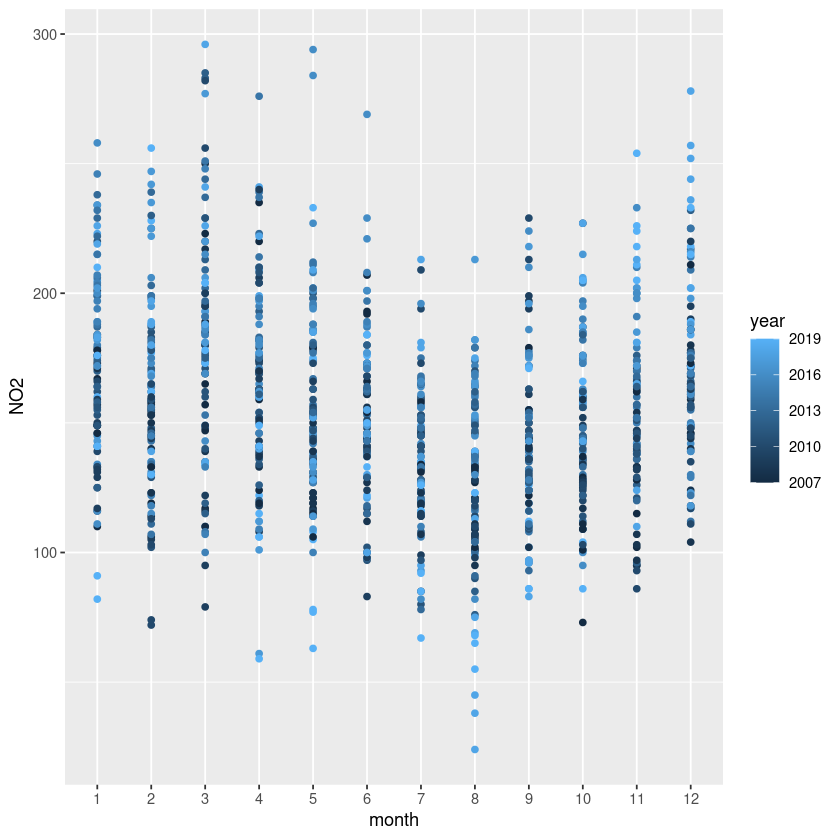

In [56]:
datam$bridge <- as.character(datam$bridge)

ggplot(datam) + geom_point(aes(x = month, y = NO2, color = year)) + scale_x_discrete(limit = c("1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12"))
